<a href="https://colab.research.google.com/github/moimigueldev/tensorflow-ztm/blob/main/03_introduction_to_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer Vision is the practive of writing algorithms which can discover patterns in visual data. Such as the camera of a self driving care recognizing the car infront.

## Get the data

We start with a smaller dataset so we can experiment quickly so we can figure out what works or what doesn't work before scaling up

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2022-05-11 02:55:24--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.5.128, 64.233.184.128, 2a00:1450:400c:c07::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.5.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M  35.0MB/s    in 3.0s    

2022-05-11 02:55:28 (35.0 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



## Inspect the data

A very crucial step at the beginning of any machine learning project is exploring the data

And for a computer vision project, this means visualizing many samples of your data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os 

# Walk trough pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza


In [ ]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 May 11 02:22 .
drwxr-xr-x 1 root root 4096 May 11 02:55 ..
drwxr-xr-x 4 root root 4096 May 11 02:22 test
drwxr-xr-x 4 root root 4096 May 11 02:22 train


In [ ]:
# Anothe way to find out how many images are in a file
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))
num_steak_images_train

750

To visualize our images first lets get class names programatically

In [ ]:
# Get the class names programatically 
import pathlib 
import numpy as np
data_dir = pathlib.Path('pizza_steak/train/')
class_names = np.array(sorted(item.name for item in data_dir.glob('*'))) # Create a list of class names from the sub directories
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# Lets' visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


def view_random_image(target_dir, target_class):
  # Set the target directory (we'll view images from here)
  target_folder = target_dir + target_class
  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  print('random image\n', random_image)

  # Read in the image and plot it
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')
  print(f'image shape: {img.shape}') # Show the shape of the image

  return img



random image
 ['2844278.jpg']
image shape: (512, 512, 3)


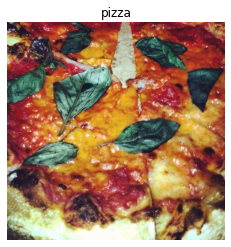

In [ ]:
img = view_random_image('pizza_steak/train/', 'pizza')

In [ ]:
import tensorflow as tf

tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 26,  25,  41],
        [ 23,  22,  36],
        [ 27,  30,  37],
        ...,
        [140,  75,  47],
        [157,  89,  54],
        [157,  85,  45]],

       [[ 23,  20,  37],
        [ 24,  23,  37],
        [ 24,  27,  34],
        ...,
        [129,  59,  34],
        [145,  72,  40],
        [143,  69,  34]],

       [[ 19,  15,  32],
        [ 26,  24,  38],
        [ 22,  22,  32],
        ...,
        [132,  55,  37],
        [140,  62,  39],
        [136,  56,  29]],

       ...,

       [[ 42,  37,  43],
        [ 43,  38,  44],
        [ 43,  38,  44],
        ...,
        [109, 110,  76],
        [118, 118,  84],
        [160, 157, 124]],

       [[ 43,  38,  42],
        [ 43,  38,  44],
        [ 42,  37,  43],
        ...,
        [111, 111,  77],
        [142, 137, 105],
        [181, 175, 143]],

       [[ 49,  44,  48],
        [ 48,  43,  47],
        [ 47,  42,  48],
        ...,
        [120, 120,  8

In [ ]:
# width - 512
# height - 512
# rgb = 3
img.shape # returns width, height, color channels

(512, 512, 3)

In [ ]:
# Get all the pizel values between 0 and 1
img/255

array([[[0.10196078, 0.09803922, 0.16078431],
        [0.09019608, 0.08627451, 0.14117647],
        [0.10588235, 0.11764706, 0.14509804],
        ...,
        [0.54901961, 0.29411765, 0.18431373],
        [0.61568627, 0.34901961, 0.21176471],
        [0.61568627, 0.33333333, 0.17647059]],

       [[0.09019608, 0.07843137, 0.14509804],
        [0.09411765, 0.09019608, 0.14509804],
        [0.09411765, 0.10588235, 0.13333333],
        ...,
        [0.50588235, 0.23137255, 0.13333333],
        [0.56862745, 0.28235294, 0.15686275],
        [0.56078431, 0.27058824, 0.13333333]],

       [[0.0745098 , 0.05882353, 0.1254902 ],
        [0.10196078, 0.09411765, 0.14901961],
        [0.08627451, 0.08627451, 0.1254902 ],
        ...,
        [0.51764706, 0.21568627, 0.14509804],
        [0.54901961, 0.24313725, 0.15294118],
        [0.53333333, 0.21960784, 0.11372549]],

       ...,

       [[0.16470588, 0.14509804, 0.16862745],
        [0.16862745, 0.14901961, 0.17254902],
        [0.16862745, 0

## An  end-to-end example

Let's build a CNN to find patterns in our images. More specifically we need to load images, preprocess, Build CNN, Compiile, Fit CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# Pre processdata (get all of the pizel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to uor data directories
train_dir = '/content/pizza_steak/train'
test_dir = 'pizza_steak/test'


# Import data from directories and truunit into batches
train_data = train_datagen.flow_from_directory(train_dir, batch_size=32, target_size=(244, 244), class_mode='binary', seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir, batch_size=32, target_size=(244,244), class_mode='binary', seed=42)

# Build a CNN model (same as the tiny VGG on the cnn explainer website)
model_1 = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(244, 244, 3)),
                                      tf.keras.layers.Conv2D(10, 3, activation='relu'),

                                      tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),

                                      tf.keras.layers.Conv2D(10, 3, activation='relu'),
                                      tf.keras.layers.Conv2D(10, 3, activation='relu'),

                                      tf.keras.layers.MaxPool2D(pool_size=2),

                                      tf.keras.layers.Flatten(),
                                      
                                      tf.keras.layers.Dense(1, activation='sigmoid')

])

model_1.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

history_1 = model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 19s 365ms/step - loss: 0.5822 - accuracy: 0.6987 - val_loss: 0.4299 - val_accuracy: 0.7900
Epoch 2/5
47/47 [==============================] - 12s 248ms/step - loss: 0.4297 - accuracy: 0.8073 - val_loss: 0.3508 - val_accuracy: 0.8580
Epoch 3/5
47/47 [==============================] - 12s 253ms/step - loss: 0.3883 - accuracy: 0.8353 - val_loss: 0.3253 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 12s 252ms/step - loss: 0.3515 - accuracy: 0.8467 - val_loss: 0.2977 - val_accuracy: 0.8820
Epoch 5/5
47/47 [==============================] - 13s 276ms/step - loss: 0.2794 - accuracy: 0.8907 - val_loss: 0.3653 - val_accuracy: 0.8440


In [ ]:
model_1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 242, 242, 10)      280       
                                                                 
 conv2d_20 (Conv2D)          (None, 240, 240, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 120, 120, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 118, 118, 10)      910       
                                                                 
 conv2d_22 (Conv2D)          (None, 116, 116, 10)      910       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 58, 58, 10)       0         
 g2D)                                                 

## Using the same model as before

Let's replicate the model we build in a previous section to see if works with our image data. The model we're building is from the tensorflow playground

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(244,244,3)),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])


history_2=model_2.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=(len(valid_data)))

Epoch 1/5
47/47 [==============================] - 11s 216ms/step - loss: 0.8986 - accuracy: 0.5033 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 213ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 211ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 209ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 208ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 178608)            0         
                                                                 
 dense_14 (Dense)            (None, 4)                 714436    
                                                                 
 dense_15 (Dense)            (None, 4)                 20        
                                                                 
 dense_16 (Dense)            (None, 1)                 5         
                                                                 
Total params: 714,461
Trainable params: 714,461
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more paremeters than our CNN model_2 performs terribly, lets try to improve it

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(244,244,3)),
                               tf.keras.layers.Dense(100, activation='relu'),
                               tf.keras.layers.Dense(100, activation='relu'),
                               tf.keras.layers.Dense(100, activation='relu'),
                               tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])


history_3=model_3.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=(len(valid_data)))

Epoch 1/5
47/47 [==============================] - 11s 221ms/step - loss: 2.9226 - accuracy: 0.6320 - val_loss: 0.6863 - val_accuracy: 0.7540
Epoch 2/5
47/47 [==============================] - 10s 212ms/step - loss: 0.8006 - accuracy: 0.7020 - val_loss: 1.7405 - val_accuracy: 0.5300
Epoch 3/5
47/47 [==============================] - 10s 212ms/step - loss: 0.8088 - accuracy: 0.7033 - val_loss: 0.7212 - val_accuracy: 0.7160
Epoch 4/5
47/47 [==============================] - 10s 215ms/step - loss: 0.5368 - accuracy: 0.7607 - val_loss: 0.8807 - val_accuracy: 0.6460
Epoch 5/5
47/47 [==============================] - 10s 216ms/step - loss: 0.5643 - accuracy: 0.7560 - val_loss: 0.5037 - val_accuracy: 0.7740


In [ ]:
model_3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 178608)            0         
                                                                 
 dense_17 (Dense)            (None, 100)               17860900  
                                                                 
 dense_18 (Dense)            (None, 100)               10100     
                                                                 
 dense_19 (Dense)            (None, 100)               10100     
                                                                 
 dense_20 (Dense)            (None, 1)                 101       
                                                                 
Total params: 17,881,201
Trainable params: 17,881,201
Non-trainable params: 0
_________________________________________________________________


random image
 ['381162.jpg']
image shape: (306, 512, 3)
random image
 ['970073.jpg']
image shape: (512, 512, 3)


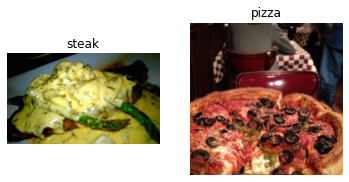

In [ ]:
# plt.figure(figsize=())
plt.subplot(1, 2, 1)
steak_img = view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1, 2, 2)
pizza_img = view_random_image('pizza_steak/train/', 'pizza')

# Preprocess the data, prepare it for the model


In [ ]:
# Define directory dataset paths 
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'


Next step is to turn the data into batches

A batch is a small subset of data. Rather than looking at all images at one time, our model might look at 32 images at a time

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processor (GPU)
2. Tryin to learn 10000 patterns at the same time could result in the model not being able to learn very well



In [ ]:
!nvidia-smi

Wed May 11 02:58:31 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P0    59W / 149W |   2393MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Create train and test data gnerators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next() # Get the next batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [ ]:
len(train_data)

47

In [ ]:
# Get the first 2 imaages
# images[:2], images[0].shape

In [ ]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### Create a CNN model (Start with a baseline)

A baseline is a relatively simple model or exisiting result that you setup when you beginning a machine learning experiment and then as you keep experimenting you try to beat the baseline

**Note:** In deep learning, there is almost an infinite amount of archtectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data. and then introduce complexity as required (e.g look at which current model is perfoming best in the field for your problem)


In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_4 = Sequential([
  Conv2D(filters=10, 
         kernel_size=3, 
         strides=1,
         padding='valid',
         activation='relu', 
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

# Fit the Model

In [ ]:
# Check the length of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
%load_ext tensorboard
import datetime, os
# Clear any logs from previous runs
!rm -rf ./logs/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
# Fit the model
# Load the TensorBoard notebook extension





history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data), 

                        )

Epoch 1/5
47/47 [==============================] - 12s 253ms/step - loss: 0.8892 - accuracy: 0.6807 - val_loss: 0.4925 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 11s 243ms/step - loss: 0.5056 - accuracy: 0.7647 - val_loss: 0.4377 - val_accuracy: 0.8060
Epoch 3/5
47/47 [==============================] - 11s 240ms/step - loss: 0.3758 - accuracy: 0.8440 - val_loss: 0.3942 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 11s 242ms/step - loss: 0.2150 - accuracy: 0.9240 - val_loss: 0.4406 - val_accuracy: 0.8140
Epoch 5/5
47/47 [==============================] - 11s 242ms/step - loss: 0.0849 - accuracy: 0.9780 - val_loss: 0.4198 - val_accuracy: 0.8220


### Evaluate model

It looks like our model is learning something, let's evaluate it

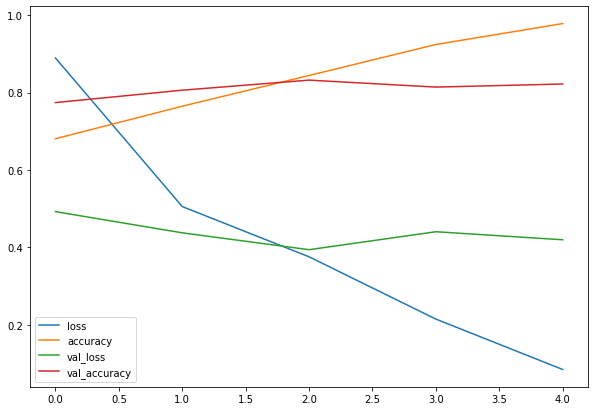

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [ ]:
# Plot the validation and training curves seperately
def plot_loss_curves(history):
  """
  Return separate los curves for training and validation metrics
  """
  loss= history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(len(history.history['loss']))

  plt.figure(figsize=(8, 5))

  #Plot loss
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  #Plot accuracy
  plt.subplot(1, 2, 2)

  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()
  plt.show()

**Note:** When a model's **validation loss** starts to increase, it's likely the model is *overfitrting* the training dataset. This means, it's learning the patterns in the training datset too well and this themode's ability to generalize to unseen data will be diminished

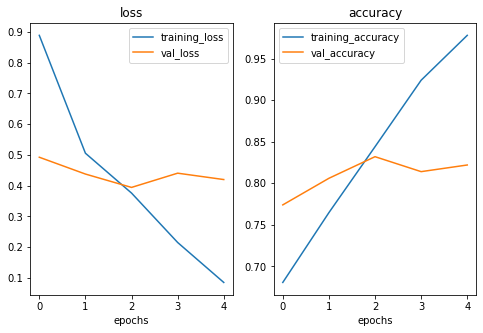

In [ ]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

🔑 **Note:** Ideally the two loss curves (Training and Validation) will be very similar to each other (Increaasing and decreasing at similar rates), when there are large differences your model may be **overfitting.**

# Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce Overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number fo conv filters
* Add another dense layer to the output of our flattened layer

Reduce Overfitting:
* Add data augmentation
* Add regularization layers (Such as MaxPool2D)
* Add more data

🔑 **Note:** Reducing overfitting is also known as *regularization*


In [ ]:
# Create the model (This is going to be our new baseline)




model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])



In [ ]:
# Compile the model
# Compile model (same as model_4)
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 223ms/step - loss: 0.6650 - accuracy: 0.6100 - val_loss: 0.5107 - val_accuracy: 0.8140
Epoch 2/5
47/47 [==============================] - 10s 220ms/step - loss: 0.4802 - accuracy: 0.7867 - val_loss: 0.4121 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 10s 217ms/step - loss: 0.4227 - accuracy: 0.8153 - val_loss: 0.3490 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 10s 222ms/step - loss: 0.4125 - accuracy: 0.8260 - val_loss: 0.3404 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 10s 222ms/step - loss: 0.3920 - accuracy: 0.8187 - val_loss: 0.3364 - val_accuracy: 0.8420


In [ ]:
# Get a sumary of our model with max pooling
model_5.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 26, 26, 10)     

In [ ]:
model_4.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_24 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_25 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_10 (Flatten)        (None, 475240)            0         
                                                                 
 dense_21 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


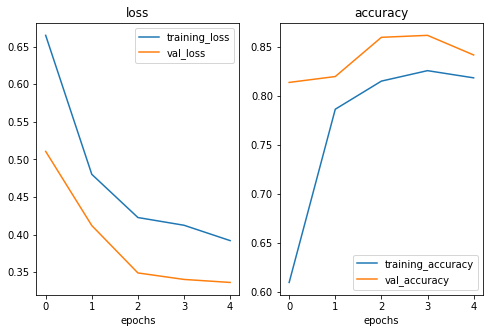

In [ ]:
# Plot_loss_curves 
plot_loss_curves(history_5)

The best ideal outcome is to create a model in which both the loss curves align as close as possible

### Opening our bag of trics and finding data augmentation


In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(
    rescale=1/255,
    rotation_range=0.2, # How much do you want to rotate an image
    shear_range=0.2, # How much do you want to sheer an image
    zoom_range=0.2, # Zoom in randomly at an image
    width_shift_range=0.2, # Move your image around on the x axis
    height_shift_range=0.3, # Move your image around on they y axis
    horizontal_flip=True # Do you want to  flip an image
    )

# Create ImageDataGenerator Without data augmentation
train_datagen = ImageDataGenerator(rescale=1./255)

# Create ImageDataGenerator without data aumentation for test dataset
test_datagen = ImageDataGenerator(rescale=1./255)

> **Question:** What is data augmentation? 

Data augmentation is the process of altering our training data leading it to have more diversity and in turn  allowing our models to learn more generalizable (hopefully) patterns.
Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Let's write some code to visualize data augmentation


In [ ]:


# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


**Note:** Data augmentation is ususally only perfomed on the training data. Using `ImageDataGenerator` built in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

Finally let's visualize some augmented data


In [ ]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Notes: 'Labels aren't augmented only images'


(-0.5, 223.5, 223.5, -0.5)

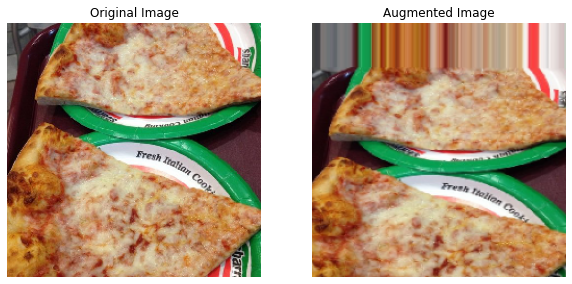

In [ ]:
# Show original image and augmented image
random_number = random.randint(0, 32) # Our batch sizes are 32

plt.figure(figsize=(10, 7))
plt.subplot(1, 2, 1)
plt.imshow(images[random_number])
plt.title('Original Image')
plt.axis(False)
plt.subplot(1, 2, 2)

plt.imshow(augmented_images[random_number])
plt.title('Augmented Image')
plt.axis(False)


Epoch 1/5
47/47 [==============================] - 36s 767ms/step - loss: 0.7444 - accuracy: 0.4220 - val_loss: 0.6894 - val_accuracy: 0.6520
Epoch 2/5
47/47 [==============================] - 26s 543ms/step - loss: 0.6943 - accuracy: 0.5100 - val_loss: 0.6877 - val_accuracy: 0.5140
Epoch 3/5
47/47 [==============================] - 26s 547ms/step - loss: 0.7040 - accuracy: 0.5193 - val_loss: 0.6899 - val_accuracy: 0.6580
Epoch 4/5
47/47 [==============================] - 27s 568ms/step - loss: 0.6894 - accuracy: 0.5820 - val_loss: 0.6771 - val_accuracy: 0.7420
Epoch 5/5
47/47 [==============================] - 25s 539ms/step - loss: 0.6910 - accuracy: 0.5520 - val_loss: 0.6568 - val_accuracy: 0.6200


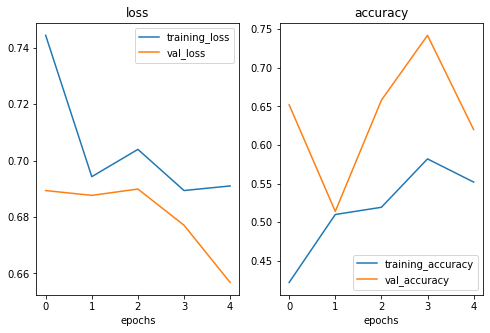

In [ ]:
# Create a new model with data augmentation
# Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

# Plot_loss_curves 
plot_loss_curves(history_6)

Let's shuffle our  augmented training data. And train another model and see what happens

In [ ]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=True)

Found 1500 images belonging to 2 classes.


Epoch 1/5
47/47 [==============================] - 27s 553ms/step - loss: 0.6885 - accuracy: 0.5573 - val_loss: 0.6741 - val_accuracy: 0.5560
Epoch 2/5
47/47 [==============================] - 26s 552ms/step - loss: 0.6252 - accuracy: 0.6580 - val_loss: 0.4764 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 25s 541ms/step - loss: 0.5759 - accuracy: 0.7220 - val_loss: 0.4391 - val_accuracy: 0.7860
Epoch 4/5
47/47 [==============================] - 25s 537ms/step - loss: 0.5633 - accuracy: 0.7200 - val_loss: 0.4018 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 25s 541ms/step - loss: 0.5148 - accuracy: 0.7560 - val_loss: 0.3597 - val_accuracy: 0.8260


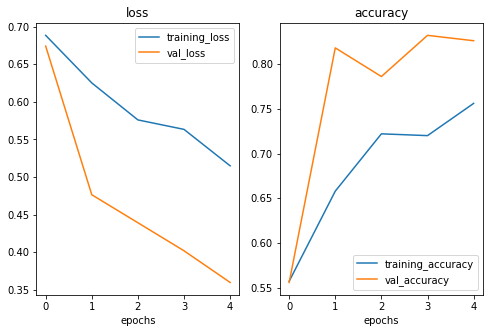

In [ ]:
# Create a new model with data augmentation
# Create the model (same as model_5)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

# Plot_loss_curves 
plot_loss_curves(history_7)

### Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could do to further improve the model:
* Increase the number of model layers (e.g add more Conv2D/Max2D layers)
* Increase the number of filters in each convolutional layer (e.g from 10 to 32 to 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (Give the model more opportunities to learn)
* Use transfer learning to levearage what another image model has learned adjust it for our own use case


# Making a prediction with our trained model on ouro wn custom data


In [139]:
# Classes we're working with 
print(class_names)

['pizza' 'steak']


In [145]:
# View our example image
# from matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread('03-steak.jpeg')


--2022-05-11 05:00:31--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.3’

03-steak.jpeg.3     100%[===================>]   1.89M  --.-KB/s    in 0.03s   

2022-05-11 05:00:31 (72.4 MB/s) - ‘03-steak.jpeg.3’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

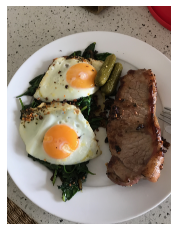

In [146]:
plt.imshow(steak)
plt.axis(False)

In [152]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

Note: When you treain a NN and you want to make a prediction with it on your own custom data it's important that you're custom data or new data is preprocessed into the same format your data was trained on

In [154]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, color_channels).
  """


  # Read in the image
  img = tf.io.read_file(filename)
  
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)

  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  
  # rescale the image (get all values between 0 and 1)
  img = img/255.

  return img

In [156]:
# Load in and preprocess our custom image 
steak = load_and_prep_image('03-steak.jpeg')
steak.shape


TensorShape([224, 224, 3])

In [159]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, wounod't it be nice if we could visualize the image as well as the model's prediction


In [158]:
# Remind ourselves of class_names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [160]:
# We can index the predicted class by rounding the prediciton probability and indexing ont he class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [172]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports and image located at filename, makes a prediction with model and plots the image with the predicted class as the title.
  """

  # Import the target image and preprocess it
  img = load_and_prep_image(filename)
  
  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))


  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f'Predicton: {pred_class} Prob: {pred[0][0] * 100: .2f}%')
  plt.axis(False)

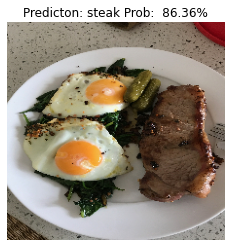

In [173]:
# Test our model on custom image
pred_and_plot(model_7, '03-steak.jpeg')

In [174]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pizza = mpimg.imread('03-pizza-dad.jpeg')

--2022-05-11 05:25:22--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.04s   

2022-05-11 05:25:22 (72.0 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]



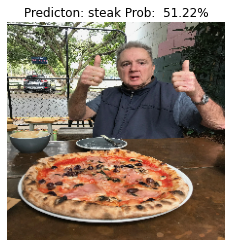

In [175]:
pred_and_plot(model_7, '03-pizza-dad.jpeg')

In [ ]:
# 